In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
experiments = ["initial", "horizontal", "top", "single"]
dfs = []
for exp in experiments:
    df = pd.read_csv(f'evals/evals_pile_{exp}.tsv', sep='\t')
    df['experiment'] = exp
    dfs.append(df)
pile_df = pd.concat(dfs, ignore_index=True)
pile_df.loc[pile_df["experiment"] == "initial", "experiment"] = "side"
pile_df = pile_df[pile_df["is_annotated"] & ~pile_df["corrupted"]]
pile_df["total_obj"] = [len(x.split(',')) if isinstance(x, str) else 1 for x in pile_df["giga_pos_modes"]]
pile_df.head()

,trial_id,run_path,giga_image,vrb_image,is_annotated,num_same,giga_pos_modes,giga_dir_modes,giga_num_false_positives,vrb_pos_modes,vrb_dir_modes,vrb_num_false_positives,corrupted,experiment,total_obj
0,23-12-07-04-17-33_round_000_trial_000,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,1.0,"1,1,0,0,0","0,1,0,0,0",0.0,"3,0,1,0,1","2,0,1,0,1",0.0,False,side,5
1,23-12-07-04-17-33_round_000_trial_002,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,0.0,"0,0,0","0,1,0",0.0,"1,1,1","1,1,1",0.0,False,side,3
2,23-12-07-04-17-33_round_000_trial_001,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,0.0,"0,0,0","1,0,0",0.0,"2,1,0","4,1,0",0.0,False,side,3
3,23-12-07-04-16-11_round_000_trial_001,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,2.0,"1,1,2,0,0","0,0,1,0,0",0.0,"0,1,2,0,2","0,1,1,0,1",0.0,False,side,5
4,23-12-07-04-16-11_round_000_trial_005,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,0.0,"0,1,0,0","0,1,0,0",0.0,"0,0,0,1","0,4,0,1",0.0,False,side,4


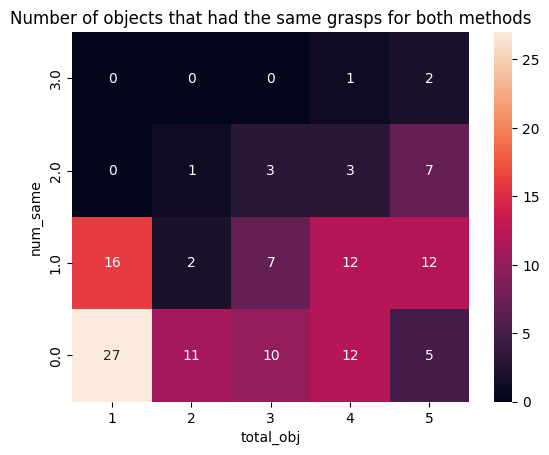

131


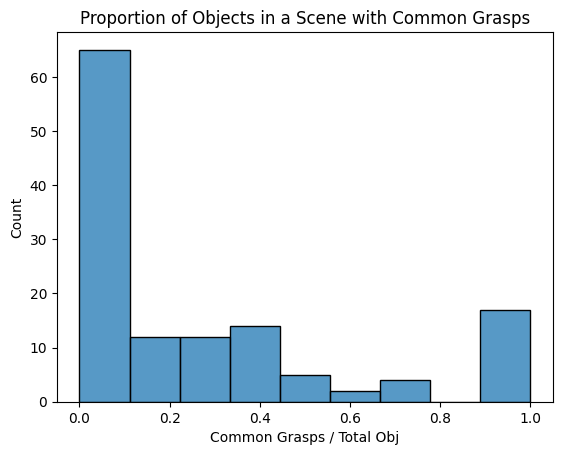

In [49]:
plt.clf()

# Create the 2D heatmap with counts annotated
heatmap = pile_df.pivot_table(index='num_same', columns='total_obj', aggfunc='size', fill_value=0)
sns.heatmap(heatmap, annot=True, fmt='d', cbar=True)

# Set the axis labels and tick labels
plt.xlabel('total_obj')
plt.ylabel('num_same')
plt.title("Number of objects that had the same grasps for both methods")
plt.gca().invert_yaxis()

# Show the plot
plt.show()
plt.clf()
sns.histplot(pile_df["num_same"] / pile_df["total_obj"])
plt.title("Proportion of Objects in a Scene with Common Grasps")
plt.xlabel("Common Grasps / Total Obj")

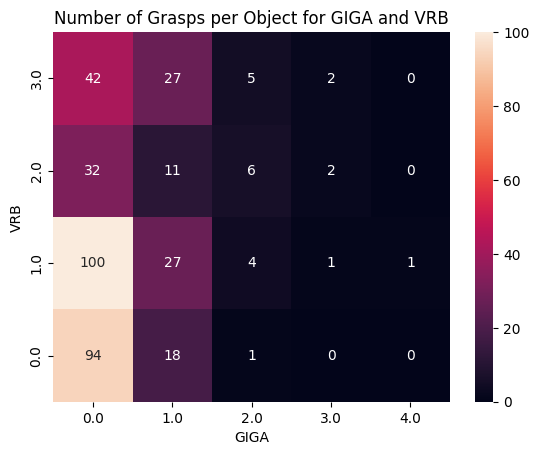

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function to extract modes
def extract_modes(df, column_name):
    flattened_modes = []
    for i, row in df.iterrows():
        modes_list = row[column_name]
        if row["experiment"] == "single":
            flattened_modes.append(modes_list)
        else:
            modes = modes_list.split(",")
            modes = [int(mode) for mode in modes if mode != ""]
            flattened_modes.extend(modes)
    return flattened_modes

# Extract modes for giga_pos_modes and vrb_pos_modes
vrb_pos_modes = extract_modes(pile_df, "vrb_pos_modes")
giga_pos_modes = extract_modes(pile_df, "giga_pos_modes")

# Create a dataframe for the heatmap
heatmap_df = pd.DataFrame({'Giga': giga_pos_modes, 'Vrb': vrb_pos_modes})

# Create the 2D heatmap with counts annotated
heatmap = heatmap_df.pivot_table(index='Vrb', columns='Giga', aggfunc='size', fill_value=0)
sns.heatmap(heatmap, annot=True, fmt='d', cbar=True)

# Set the axis labels and tick labels
plt.xlabel('GIGA')
plt.ylabel('VRB')
plt.title('Number of Grasps per Object for GIGA and VRB')
plt.gca().invert_yaxis()

# Show the plot
plt.show()


In [54]:
giga_dir_modes = extract_modes(pile_df, "giga_dir_modes")
vrb_dir_modes = extract_modes(pile_df, "vrb_dir_modes")

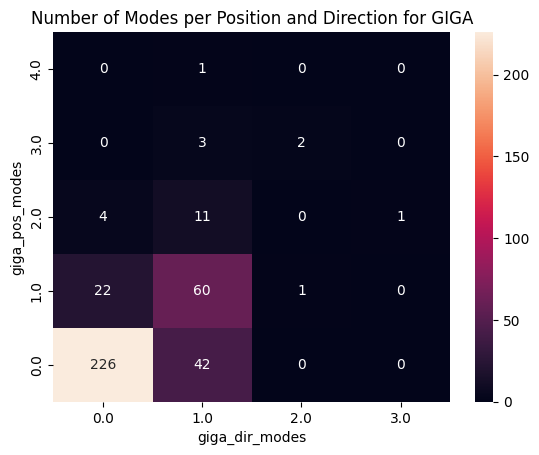

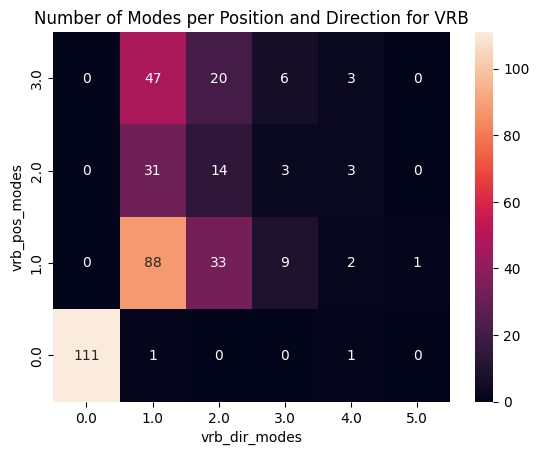

In [55]:
def plot_heatmap(df, x_data, y_data, x_col, y_col, title):
    # Create the dataframe for the heatmap
    heatmap_df = pd.DataFrame({x_col: x_data, y_col: y_data})

    # Create the 2D heatmap with counts annotated
    heatmap = heatmap_df.pivot_table(index=x_col, columns=y_col, aggfunc='size', fill_value=0)
    sns.heatmap(heatmap, annot=True, fmt='d', cbar=True)

    # Set the axis labels and tick labels
    plt.xlabel(y_col)
    plt.ylabel(x_col)
    plt.title(title)
    plt.gca().invert_yaxis()

    # Show the plot
    plt.show()

# Plot heatmap for GIGA
plot_heatmap(pile_df, giga_pos_modes, giga_dir_modes, 'giga_pos_modes', 'giga_dir_modes', 'Number of Modes per Position and Direction for GIGA')

# Plot heatmap for VRB
plot_heatmap(pile_df, vrb_pos_modes, vrb_dir_modes, 'vrb_pos_modes', 'vrb_dir_modes', 'Number of Modes per Position and Direction for VRB')


In [56]:
def calculate_num_detected(prefix):
    pos_col = prefix + "_pos_modes"
    dir_col = prefix + "_dir_modes"
    num_detected = []
    for i, row in pile_df.iterrows():
        try:
            pos_detected = [int(x) > 0 for x in row[pos_col].split(',')]
            dir_detected = [int(x) > 0 for x in row[dir_col].split(',')]
            num_detected.append(sum([p and d for p, d in zip(pos_detected, dir_detected)]))
        except:
            num_detected.append(None)
    pile_df[prefix + "_num_detected"] = num_detected

calculate_num_detected("giga")
calculate_num_detected("vrb")
pile_df.head()

,trial_id,run_path,giga_image,vrb_image,is_annotated,num_same,giga_pos_modes,giga_dir_modes,giga_num_false_positives,vrb_pos_modes,vrb_dir_modes,vrb_num_false_positives,corrupted,experiment,total_obj,giga_num_detected,vrb_num_detected
0,23-12-07-04-17-33_round_000_trial_000,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,1.0,"1,1,0,0,0","0,1,0,0,0",0.0,"3,0,1,0,1","2,0,1,0,1",0.0,False,side,5,1.0,3.0
1,23-12-07-04-17-33_round_000_trial_002,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,0.0,"0,0,0","0,1,0",0.0,"1,1,1","1,1,1",0.0,False,side,3,0.0,3.0
2,23-12-07-04-17-33_round_000_trial_001,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,0.0,"0,0,0","1,0,0",0.0,"2,1,0","4,1,0",0.0,False,side,3,0.0,2.0
3,23-12-07-04-16-11_round_000_trial_001,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,2.0,"1,1,2,0,0","0,0,1,0,0",0.0,"0,1,2,0,2","0,1,1,0,1",0.0,False,side,5,1.0,3.0
4,23-12-07-04-16-11_round_000_trial_005,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,/Users/ishangaur/affordance-bench/experiments/...,True,0.0,"0,1,0,0","0,1,0,0",0.0,"0,0,0,1","0,4,0,1",0.0,False,side,4,1.0,1.0


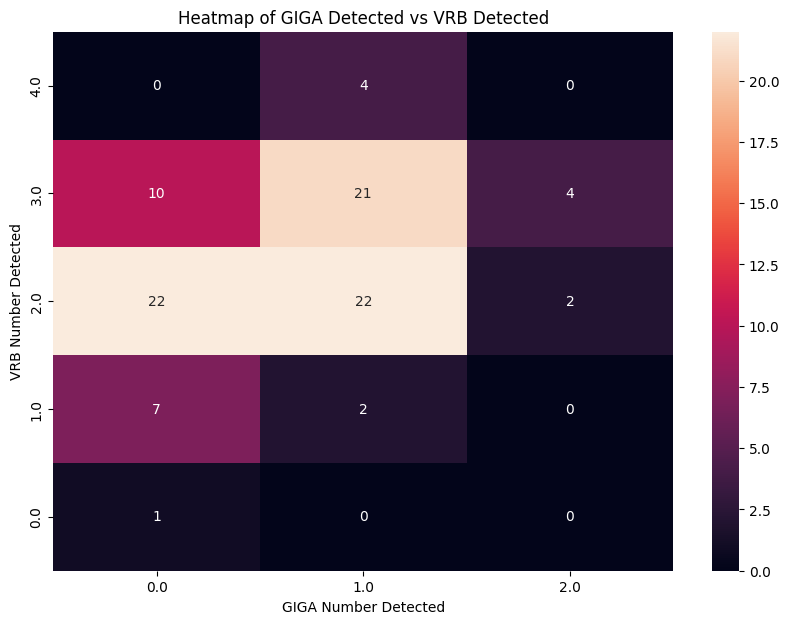

In [57]:
plt.figure(figsize=(10, 7))
heatmap = pile_df.pivot_table(index='vrb_num_detected', columns='giga_num_detected', aggfunc='size', fill_value=0)
sns.heatmap(heatmap, annot=True, fmt='d', cbar=True) 
plt.title('Heatmap of GIGA Detected vs VRB Detected')
plt.xlabel('GIGA Number Detected')
plt.ylabel('VRB Number Detected')
plt.gca().invert_yaxis()  # Ensure the y-axis is decreasing top to bottom
plt.show()



/var/folders/bq/fzr5srps2j1clknlxgts60300000gq/T/ipykernel_52189/404206698.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['giga_proportion_detected'] = experiment_df['giga_num_detected'] / experiment_df['total_obj']
/var/folders/bq/fzr5srps2j1clknlxgts60300000gq/T/ipykernel_52189/404206698.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_df['vrb_proportion_detected'] = experiment_df['vrb_num_detected'] / experiment_df['total_obj']
/var/folders/bq/fzr5srps2j1clknlxgts603000

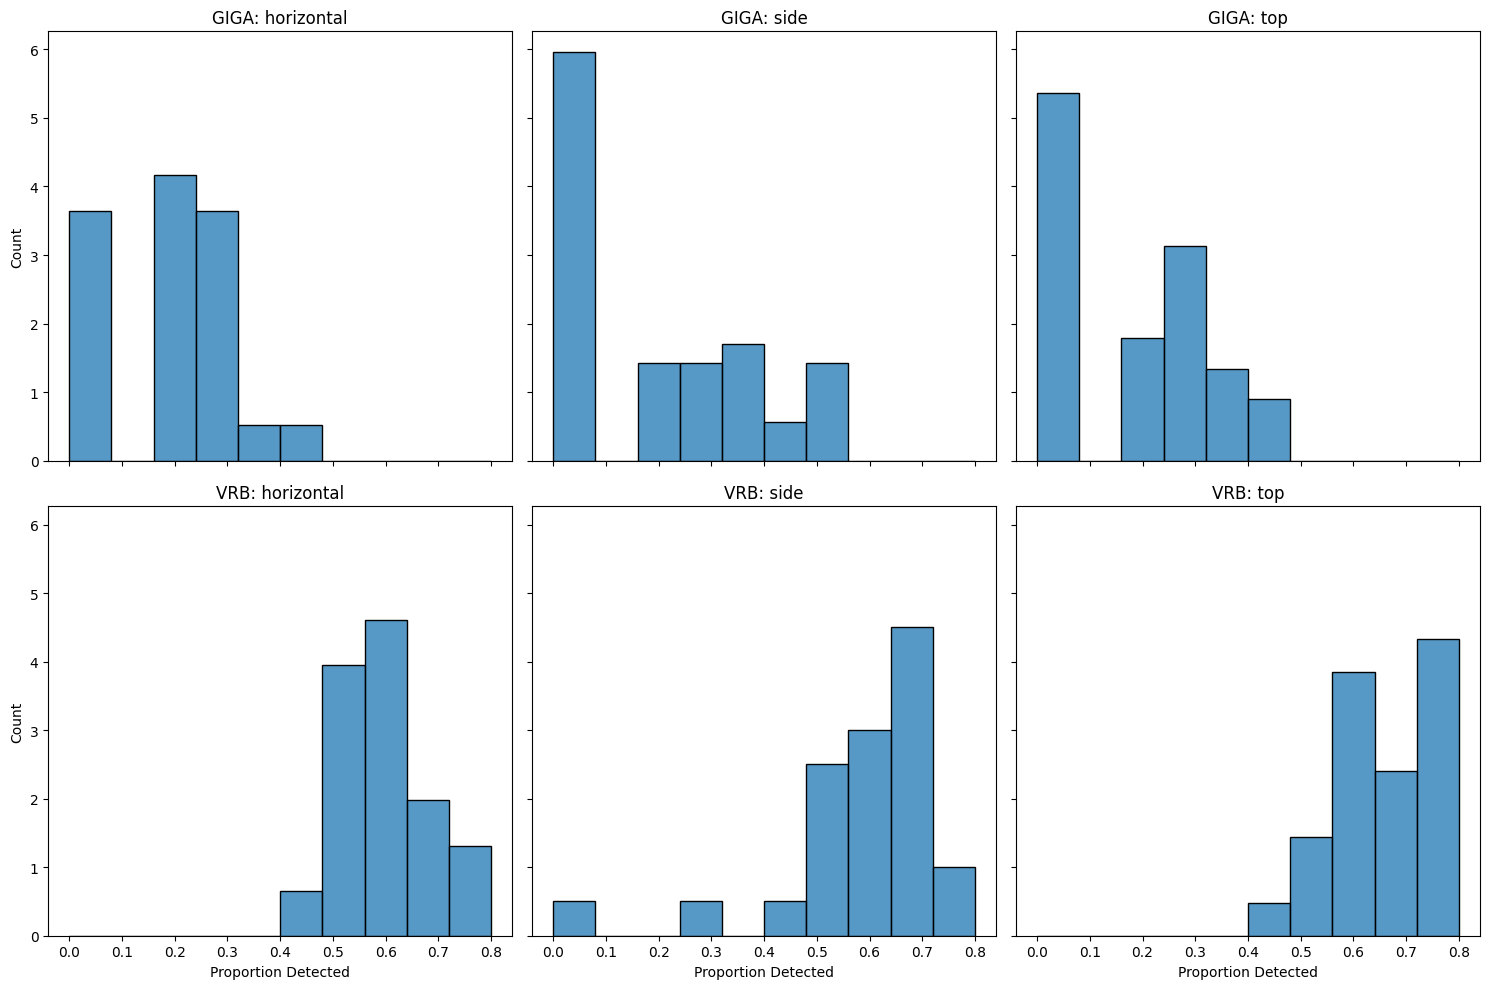

In [67]:

import seaborn as sns
import matplotlib.pyplot as plt

# Define the experiments
experiments = ["horizontal", "side", "top"]

# Set up the matplotlib figure
fig, axes = plt.subplots(2, len(experiments), figsize=(5 * len(experiments), 10), sharex=True, sharey=True)

# Determine the bin range for the histograms
bin_range = (0, pile_df[['giga_num_detected', 'vrb_num_detected']].max().max() / pile_df['total_obj'].max())

# Loop through each experiment and plot the proportion of objects detected for each algorithm
for i, experiment in enumerate(experiments):
    # Filter the dataframe for the current experiment
    experiment_df = pile_df[pile_df['experiment'] == experiment]
    
    # Calculate the proportion of objects detected for each algorithm
    experiment_df['giga_proportion_detected'] = experiment_df['giga_num_detected'] / experiment_df['total_obj']
    experiment_df['vrb_proportion_detected'] = experiment_df['vrb_num_detected'] / experiment_df['total_obj']
    
    # Histogram for GIGA with KDE
    sns.histplot(ax=axes[0, i], x='giga_proportion_detected', data=experiment_df, bins=10, binrange=bin_range, stat='density')
    axes[0, i].set_title(f'GIGA: {experiment}')
    axes[0, i].set_xlabel('Proportion Detected')
    axes[0, i].set_ylabel('Count')
    
    # Histogram for VRB with KDE
    sns.histplot(ax=axes[1, i], x='vrb_proportion_detected', data=experiment_df, bins=10, binrange=bin_range, stat='density')
    axes[1, i].set_title(f'VRB: {experiment}')
    axes[1, i].set_xlabel('Proportion Detected')
    axes[1, i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

